# **APRIORI**

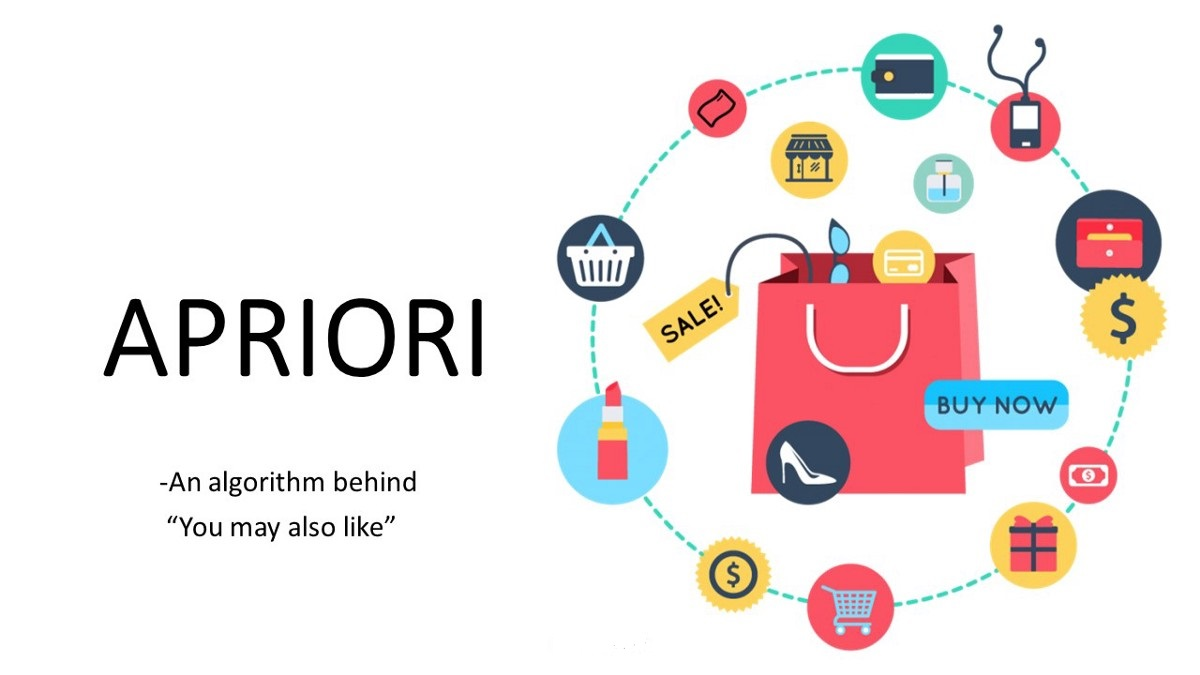

## ***IMPORTING LIBRARIES***

In [1]:
import numpy as np
import pandas as pd

## ***LOADING THE DATASET***

In [2]:
data = pd.read_csv("Market_Basket_Optimisation.csv")

## ***SUMMARIZING THE DATASET***

In [4]:
print(data.shape)
print(data.head())

(7500, 20)
           shrimp    almonds     avocado  ... frozen smoothie spinach olive oil
0         burgers  meatballs        eggs  ...             NaN     NaN       NaN
1         chutney        NaN         NaN  ...             NaN     NaN       NaN
2          turkey    avocado         NaN  ...             NaN     NaN       NaN
3   mineral water       milk  energy bar  ...             NaN     NaN       NaN
4  low fat yogurt        NaN         NaN  ...             NaN     NaN       NaN

[5 rows x 20 columns]


## ***DATA PRE-PROCESSING***

In [12]:
transactions = []

for i in range(0,7500):
    transactions.append([str(data.values[i,j]) for j in range(0,20)])

In [13]:
transactions

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

## ***TRAINING THE DATASET***

In [14]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=5602de019192b327846218ec64b4d216470c84f2defc2a8edb52e75196ed7180
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [15]:
from apyori import apriori

APRIORI_Model = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## ***DISPLAYING THE RESULT***

In [16]:
result = list(APRIORI_Model)
result

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confiden

## ***DISPLAYING THE RESULT IN DATAFRAME FORMAT***

In [45]:
lhs               =    [tuple(i[2][0][0])[0] for i in result]
rhs               =    [tuple(i[2][0][1])[0] for i in result]

support           =    [i[1] for i in result]
confidence        =    [i[2][0][2] for i in result]
lift              =    [i[2][0][3] for i in result]

result_DataFrame  =    pd.DataFrame(zip(lhs,rhs,support,confidence,lift), columns=["Left Hand Side","Right Hand Side","Support","Confidence","Lift"])

result_DataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843305
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790327
2,pasta,escalope,0.005867,0.372881,4.700185
3,fromage blanc,honey,0.003333,0.245098,5.178128
4,herb & pepper,ground beef,0.016000,0.323450,3.291555
5,tomato sauce,ground beef,0.005333,0.377358,3.840147
6,light cream,olive oil,0.003200,0.205128,3.120612
7,whole wheat pasta,olive oil,0.008000,0.271493,4.130221
8,pasta,shrimp,0.005067,0.322034,4.514494


## ***SORTING THE VALUES BASED ON THE SUPPORT COLUMN***

In [46]:
result_DataFrame.nlargest(n=10, columns = "Support")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4,herb & pepper,ground beef,0.016000,0.323450,3.291555
7,whole wheat pasta,olive oil,0.008000,0.271493,4.130221
2,pasta,escalope,0.005867,0.372881,4.700185
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790327
5,tomato sauce,ground beef,0.005333,0.377358,3.840147
8,pasta,shrimp,0.005067,0.322034,4.514494
0,light cream,chicken,0.004533,0.290598,4.843305
3,fromage blanc,honey,0.003333,0.245098,5.178128
6,light cream,olive oil,0.003200,0.205128,3.120612
